In [10]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("intern_public_dataset_2022/df_train_20220802.csv", low_memory=False)
df_rt = pd.read_csv("intern_public_dataset_2022/df_rt_20220802.csv", low_memory=False)
df_test_unlabeled = pd.read_csv("intern_public_dataset_2022/df_test_unlabeled_20220802.csv", low_memory=False)
df["request_time"] = pd.to_datetime(df["request_time"])
df_test_unlabeled["request_time"] = pd.to_datetime(df_test_unlabeled["request_time"])
df_rt["request_time"] = pd.to_datetime(df_rt["request_time"])
df

,req_id,request_time,os_id,ssp_uid,slot_id,n_slot_position,sponsor_id,campaign_id,creative_id,region,...,prob_man,sponsor_fq,sponsor_inview_fq,sponsor_recency,sponsor_inview_recency,click_time,cv_time,click_flg,cv_flg,site_id
0,0,2022-06-14 15:00:07+00:00,Windows,0,0,3.0,0,0,0,aichi,...,0.985029,6,5,370,410,NaN,NaN,0,0,0
1,1,2022-06-14 15:00:07+00:00,iOS,1,1,NaN,1,1,1,osaka,...,NaN,0,0,-1,-1,NaN,NaN,0,0,1
2,2,2022-06-14 15:00:07+00:00,iOS,1,2,NaN,1,1,2,osaka,...,NaN,0,0,-1,-1,NaN,NaN,0,0,1
3,3,2022-06-14 15:00:08+00:00,Windows,2,3,NaN,2,2,3,tokyo,...,NaN,5,2,5,2,NaN,NaN,0,0,2
4,4,2022-06-14 15:00:09+00:00,Android,3,4,NaN,3,3,4,tokyo,...,NaN,0,0,-1,-1,NaN,NaN,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038562,5038562,2022-07-26 14:59:52+00:00,Android,158132,979,NaN,8,8,118,miyazaki,...,NaN,8,1,145,15356,NaN,NaN,0,0,11
5038563,5038563,2022-07-26 14:59:55+00:00,Android,164623,225,3.0,7,7,35,tokyo,...,NaN,2,0,37590,-1,NaN,NaN,0,0,31
5038564,5038564,2022-07-26 14:59:57+00:00,iOS,3054,2,NaN,2,2,708,kagoshima,...,NaN,3,1,219,308,NaN,NaN,0,0,1
5038565,5038565,2022-07-26 14:59:57+00:00,Android,53986,6,1.0,17,17,491,osaka,...,NaN,1,0,5,-1,NaN,NaN,0,0,5


In [18]:
print((df['sponsor_id']==df['campaign_id']).sum())

5038567


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5038567 entries, 0 to 5038566
Data columns (total 21 columns):
 #   Column                  Dtype              
---  ------                  -----              
 0   req_id                  int64              
 1   request_time            datetime64[ns, UTC]
 2   os_id                   object             
 3   ssp_uid                 int64              
 4   slot_id                 int64              
 5   n_slot_position         float64            
 6   sponsor_id              int64              
 7   campaign_id             int64              
 8   creative_id             int64              
 9   region                  object             
 10  ref                     float64            
 11  prob_man                float64            
 12  sponsor_fq              int64              
 13  sponsor_inview_fq       int64              
 14  sponsor_recency         int64              
 15  sponsor_inview_recency  int64              
 16  

In [11]:
dic_osid = []
dic_region= []
encode_cols = ['os_id','region']
for c in encode_cols:
    if c == 'os_id':
        env,obj = pd.factorize(df[c],sort=True)
        df[c] = env
        dic_osid = obj
    else:
        env,obj = pd.factorize(df[c],sort=True)
        df[c] = env
        dic_region = obj
print(dic_osid)
print(dic_region)
df

Index(['Android', 'Mac', 'Windows', 'iOS'], dtype='object')
Index(['aichi', 'akita', 'aomori', 'chiba', 'ehime', 'fukui', 'fukuoka',
       'fukushima', 'gifu', 'gumma', 'hiroshima', 'hokkaido', 'hyogo',
       'ibaraki', 'ishikawa', 'iwate', 'kagawa', 'kagoshima', 'kanagawa',
       'kochi', 'kumamoto', 'kyoto', 'mie', 'miyagi', 'miyazaki', 'nagano',
       'nagasaki', 'nara', 'niigata', 'oita', 'okayama', 'okinawa', 'osaka',
       'saga', 'saitama', 'shiga', 'shimane', 'shizuoka', 'tochigi',
       'tokushima', 'tokyo', 'tottori', 'toyama', 'wakayama', 'yamagata',
       'yamaguchi', 'yamanashi'],
      dtype='object')


,req_id,request_time,os_id,ssp_uid,slot_id,n_slot_position,sponsor_id,campaign_id,creative_id,region,...,prob_man,sponsor_fq,sponsor_inview_fq,sponsor_recency,sponsor_inview_recency,click_time,cv_time,click_flg,cv_flg,site_id
0,0,2022-06-14 15:00:07+00:00,2,0,0,3.0,0,0,0,0,...,0.985029,6,5,370,410,NaN,NaN,0,0,0
1,1,2022-06-14 15:00:07+00:00,3,1,1,NaN,1,1,1,32,...,NaN,0,0,-1,-1,NaN,NaN,0,0,1
2,2,2022-06-14 15:00:07+00:00,3,1,2,NaN,1,1,2,32,...,NaN,0,0,-1,-1,NaN,NaN,0,0,1
3,3,2022-06-14 15:00:08+00:00,2,2,3,NaN,2,2,3,40,...,NaN,5,2,5,2,NaN,NaN,0,0,2
4,4,2022-06-14 15:00:09+00:00,0,3,4,NaN,3,3,4,40,...,NaN,0,0,-1,-1,NaN,NaN,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038562,5038562,2022-07-26 14:59:52+00:00,0,158132,979,NaN,8,8,118,24,...,NaN,8,1,145,15356,NaN,NaN,0,0,11
5038563,5038563,2022-07-26 14:59:55+00:00,0,164623,225,3.0,7,7,35,40,...,NaN,2,0,37590,-1,NaN,NaN,0,0,31
5038564,5038564,2022-07-26 14:59:57+00:00,3,3054,2,NaN,2,2,708,17,...,NaN,3,1,219,308,NaN,NaN,0,0,1
5038565,5038565,2022-07-26 14:59:57+00:00,0,53986,6,1.0,17,17,491,32,...,NaN,1,0,5,-1,NaN,NaN,0,0,5


In [12]:
df = df.fillna(df.mean())
df.dropna(axis=1,how='any',inplace=True)
df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,req_id,request_time,os_id,ssp_uid,slot_id,n_slot_position,sponsor_id,campaign_id,creative_id,region,ref,prob_man,sponsor_fq,sponsor_inview_fq,sponsor_recency,sponsor_inview_recency,click_flg,cv_flg,site_id
0,0,2022-06-14 15:00:07+00:00,2,0,0,3.000000,0,0,0,0,0.000000,0.985029,6,5,370,410,0,0,0
1,1,2022-06-14 15:00:07+00:00,3,1,1,2.264248,1,1,1,32,124154.795406,0.525834,0,0,-1,-1,0,0,1
2,2,2022-06-14 15:00:07+00:00,3,1,2,2.264248,1,1,2,32,124154.795406,0.525834,0,0,-1,-1,0,0,1
3,3,2022-06-14 15:00:08+00:00,2,2,3,2.264248,2,2,3,40,2.000000,0.525834,5,2,5,2,0,0,2
4,4,2022-06-14 15:00:09+00:00,0,3,4,2.264248,3,3,4,40,3.000000,0.525834,0,0,-1,-1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038562,5038562,2022-07-26 14:59:52+00:00,0,158132,979,2.264248,8,8,118,24,124154.795406,0.525834,8,1,145,15356,0,0,11
5038563,5038563,2022-07-26 14:59:55+00:00,0,164623,225,3.000000,7,7,35,40,124154.795406,0.525834,2,0,37590,-1,0,0,31
5038564,5038564,2022-07-26 14:59:57+00:00,3,3054,2,2.264248,2,2,708,17,1834.000000,0.525834,3,1,219,308,0,0,1
5038565,5038565,2022-07-26 14:59:57+00:00,0,53986,6,1.000000,17,17,491,32,5.000000,0.525834,1,0,5,-1,0,0,5


In [4]:
df['request_time']=pd.to_datetime(df['request_time'])
new = pd.DataFrame((df.groupby([(df['request_time'].dt.month),(df['request_time'].dt.day)])["click_flg"].sum())/(df.groupby([(df['request_time'].dt.month),(df['request_time'].dt.day)])["click_flg"].size()))


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier



In [14]:
X = df.drop(['click_flg','request_time'], axis=1)
Y = df['click_flg']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=0, stratify=Y)
X

,req_id,os_id,ssp_uid,slot_id,n_slot_position,sponsor_id,campaign_id,creative_id,region,ref,prob_man,sponsor_fq,sponsor_inview_fq,sponsor_recency,sponsor_inview_recency,cv_flg,site_id
0,0,2,0,0,3.000000,0,0,0,0,0.000000,0.985029,6,5,370,410,0,0
1,1,3,1,1,2.264248,1,1,1,32,124154.795406,0.525834,0,0,-1,-1,0,1
2,2,3,1,2,2.264248,1,1,2,32,124154.795406,0.525834,0,0,-1,-1,0,1
3,3,2,2,3,2.264248,2,2,3,40,2.000000,0.525834,5,2,5,2,0,2
4,4,0,3,4,2.264248,3,3,4,40,3.000000,0.525834,0,0,-1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038562,5038562,0,158132,979,2.264248,8,8,118,24,124154.795406,0.525834,8,1,145,15356,0,11
5038563,5038563,0,164623,225,3.000000,7,7,35,40,124154.795406,0.525834,2,0,37590,-1,0,31
5038564,5038564,3,3054,2,2.264248,2,2,708,17,1834.000000,0.525834,3,1,219,308,0,1
5038565,5038565,0,53986,6,1.000000,17,17,491,32,5.000000,0.525834,1,0,5,-1,0,5


In [15]:
X_n = X.drop(['cv_flg'], axis=1)
Y_n = Y
X_n_train, X_n_test, Y_n_train, Y_n_test = train_test_split(X_n, Y_n, test_size=0.30, random_state=0, stratify=Y_n)


In [43]:
len(Y_train)

3526996

In [7]:
n = 0
i = 50000

In [ ]:
# rf = RandomForestClassifier(random_state=0,n_jobs=1)

# while i <= len(Y_train):
#     rf.fit(X_train[n:i],Y_train[n:i])
#     n += 50000
#     i += 50000

In [9]:
rf = RandomForestClassifier(random_state=0)

while i <= len(Y_n_train):
    rf.fit(X_n_train[n:i],Y_n_train[n:i])
    n += 10000
    i += 10000

In [10]:
importances = rf.feature_importances_

In [11]:
importances

array([0.14226462, 0.00960954, 0.13988437, 0.08877116, 0.03376817,
       0.03449499, 0.03536034, 0.08108758, 0.05489481, 0.0893069 ,
       0.0374054 , 0.0406262 , 0.03025102, 0.07161538, 0.0488286 ,
       0.06183091])

Text(0.5, 0, 'Random Forest Feature Importance')

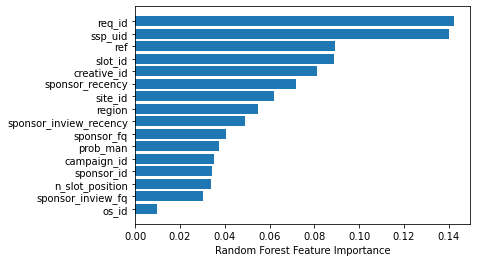

In [12]:
sorted_idx = importances.argsort()
plt.barh(X_n_train.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Text(0.5, 0, 'Random Forest Feature Importance')

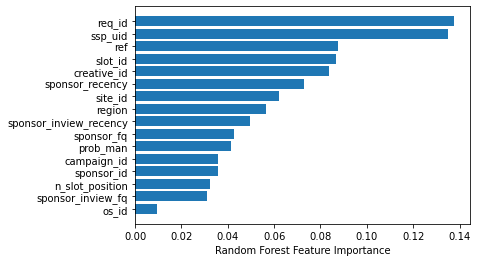

In [11]:
sorted_idx = importances.argsort()
plt.barh(X_n_train.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [12]:
sorted_idx = importances.argsort()
X_n_train.columns[sorted_idx][15]
lst = []
for i in range(len(X_n_train.columns[sorted_idx])):
    lst.append(X_n_train.columns[sorted_idx][i])
lst.reverse()
lst


['req_id',
 'ssp_uid',
 'ref',
 'slot_id',
 'creative_id',
 'sponsor_recency',
 'site_id',
 'region',
 'sponsor_inview_recency',
 'sponsor_fq',
 'prob_man',
 'campaign_id',
 'sponsor_id',
 'n_slot_position',
 'sponsor_inview_fq',
 'os_id']

In [16]:
sorted_idx = importances.argsort()
X_n_train.columns[sorted_idx][15]
lst = []
for i in range(len(X_n_train.columns[sorted_idx])):
    lst.append(X_n_train.columns[sorted_idx][i])
lst.reverse()
lst

NameError: name 'importances' is not defined

In [17]:
lst=['req_id',
 'ssp_uid',
 'ref',
 'slot_id',
 'creative_id',
 'sponsor_recency',
 'site_id',
 'region',
 'sponsor_inview_recency',
 'sponsor_fq',
 'prob_man',
 # 'campaign_id',
 'sponsor_id',
 'n_slot_position',
 'sponsor_inview_fq',
 'os_id']
lst

['req_id',
 'ssp_uid',
 'ref',
 'slot_id',
 'creative_id',
 'sponsor_recency',
 'site_id',
 'region',
 'sponsor_inview_recency',
 'sponsor_fq',
 'prob_man',
 'sponsor_id',
 'n_slot_position',
 'sponsor_inview_fq',
 'os_id']

In [19]:
n_train = pd.DataFrame(X_n_train,columns = lst[:13])
n_train

,req_id,ssp_uid,ref,slot_id,creative_id,sponsor_recency,site_id,region,sponsor_inview_recency,sponsor_fq,prob_man,sponsor_id,n_slot_position
745306,745306,14602,20255.000000,164,59,164,74,40,2836,5,0.525834,3,2.264248
2190347,2190347,152578,230886.000000,129,498,97,27,39,94,1,0.525834,5,2.000000
3565356,3565356,1906,353680.000000,14,985,3093,10,0,18865,16,0.525834,15,3.000000
810484,810484,153381,537.000000,143,10,21,66,22,3,15,0.525834,0,2.264248
2865158,2865158,57094,124154.795406,22,35,31722,5,20,-1,2,0.525834,7,2.264248
...,...,...,...,...,...,...,...,...,...,...,...,...,...
731155,731155,11873,324.000000,36,48,14,21,40,49,15,0.525834,1,2.264248
795557,795557,69981,124154.795406,106,293,-1,0,40,-1,0,0.525834,17,4.000000
93283,93283,26729,124154.795406,2,13,14,1,40,-1,1,0.525834,7,2.264248
2632837,2632837,113959,259434.000000,110,598,36,52,-1,33,9,0.525834,1,2.264248


In [17]:
lst[:13]

['req_id',
 'ssp_uid',
 'ref',
 'slot_id',
 'creative_id',
 'sponsor_recency',
 'site_id',
 'region',
 'sponsor_inview_recency',
 'sponsor_fq',
 'prob_man',
 'campaign_id',
 'sponsor_id']

In [ ]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import time



dims = [8,9,10,11,12,13]

times_predict=[]
times_train = []
ROC_AUC_SCORE = []

for dim in dims:
    
    model = lgb.LGBMClassifier()
    n_train = pd.DataFrame(X_n_train,columns = lst[:dim])
    n_test = pd.DataFrame(X_n_test,columns=lst[:dim])
    n_train_label = Y_n_train
    
    time_start_train = time.time()
    model.fit(n_train,n_train_label)
    time_end_train = time.time()
    times_train.append(time_end_train-time_start_train)
    
    time_start_pred = time.time()
    Y_pre = model.predict_proba(n_test)
    time_end_pred = time.time()
    times_predict.append(time_end_pred-time_start_pred)
    
    tmp = roc_auc_score(Y_n_test,Y_pre[:,-1])
    ROC_AUC_SCORE.append(tmp)
    print(tmp)
# plt.plot(x, y, label="ROC_AUC_SCORE")
# plt.legend()
# plt.show()

0.8638762741921417
0.8644889853804564
0.8639560798741793
0.8628366216626365
0.8668602229699592
0.8722663021996034


In [14]:
times_predict

[4.757906436920166,
 4.946686506271362,
 4.793347120285034,
 4.767031669616699,
 4.797030448913574,
 4.993752479553223]

In [15]:
times_train

[29.149436473846436,
 26.01738476753235,
 28.92871379852295,
 27.9849750995636,
 31.63607096672058,
 29.973177671432495]

In [ ]:
#tree 生成
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import time



dims = [8,9,10,11,12,13]

times_predict=[]
times_train = []
ROC_AUC_SCORE = []

# for dim in dims:
    
model = lgb.LGBMClassifier()
n_train = pd.DataFrame(X_n_train,columns = lst[:dim])
n_test = pd.DataFrame(X_n_test,columns=lst[:dim])
n_train_label = Y_n_train

time_start_train = time.time()
model.fit(n_train,n_train_label)
time_end_train = time.time()
times_train.append(time_end_train-time_start_train)

time_start_pred = time.time()
Y_pre = model.predict_proba(n_test)
time_end_pred = time.time()
times_predict.append(time_end_pred-time_start_pred)

tmp = roc_auc_score(Y_n_test,Y_pre[:,-1])
ROC_AUC_SCORE.append(tmp)
print(tmp)

In [13]:
X_n_train['sponsor_id']

745306      3
2190347     5
3565356    15
810484      0
2865158     7
           ..
731155      1
795557     17
93283       7
2632837     1
4372750     2
Name: sponsor_id, Length: 3526996, dtype: int64

In [10]:
n_train

,req_id,ssp_uid,ref,slot_id,creative_id,sponsor_recency,site_id,region,sponsor_inview_recency,sponsor_fq,prob_man,campaign_id,sponsor_id
745306,745306,14602,20255.000000,164,59,164,74,40,2836,5,0.525834,3,3
2190347,2190347,152578,230886.000000,129,498,97,27,39,94,1,0.525834,5,5
3565356,3565356,1906,353680.000000,14,985,3093,10,0,18865,16,0.525834,15,15
810484,810484,153381,537.000000,143,10,21,66,22,3,15,0.525834,0,0
2865158,2865158,57094,124154.795406,22,35,31722,5,20,-1,2,0.525834,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
731155,731155,11873,324.000000,36,48,14,21,40,49,15,0.525834,1,1
795557,795557,69981,124154.795406,106,293,-1,0,40,-1,0,0.525834,17,17
93283,93283,26729,124154.795406,2,13,14,1,40,-1,1,0.525834,7,7
2632837,2632837,113959,259434.000000,110,598,36,52,-1,33,9,0.525834,1,1


In [15]:
times_train

[29.431183099746704,
 28.400020599365234,
 28.368229866027832,
 29.002838611602783,
 32.47084593772888,
 30.618134260177612]

Text(0.5, 1.0, 'Times to predict')

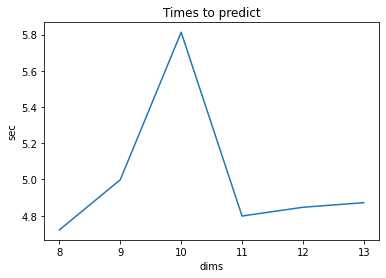

In [18]:
fig,ax=plt.subplots()
x = dims
y1 = times_train
y2 = times_predict
# ax.plot(x,y1,label='times_train')
ax.plot(x,y2)
ax.set_xlabel('dims')
ax.set_ylabel('sec')
ax.set_title('Times to predict')

Text(0.5, 1.0, 'Times to train')

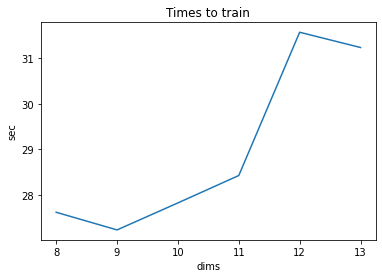

In [19]:
fig,ax=plt.subplots()
x = dims
y1 = times_train
# ax.plot(x,y1,label='times_train')
ax.plot(x,y1)
ax.set_xlabel('dims')
ax.set_ylabel('sec')
ax.set_title('Times to train')

Text(0.5, 1.0, 'ROC_AUC_SCORE')

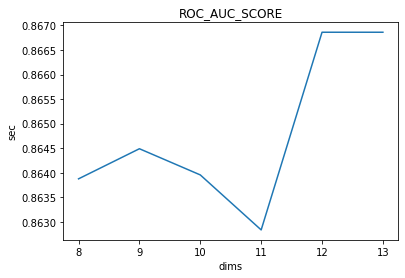

In [21]:
fig,ax=plt.subplots()
x = dims
y = ROC_AUC_SCORE
ax.plot(x,y)
ax.set_xlabel('dims')
ax.set_ylabel('sec')
ax.set_title('ROC_AUC_SCORE')

In [15]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import time



dims = [8,9,10,11,12,13]

times_predict=[]
times_train = []
ROC_AUC_SCORE = []

for dim in dims:
    
    model = lgb.LGBMClassifier()
    n_train = pd.DataFrame(X_n_train,columns = lst[:dim])
    n_test = pd.DataFrame(X_n_test,columns=lst[:dim])
    n_train_label = Y_n_train
    
    time_start_train = time.time()
    model.fit(n_train,n_train_label)
    time_end_train = time.time()
    times_train.append(time_end_train-time_start_train)
    
    time_start_pred = time.time()
    Y_pre = model.predict_proba(n_test)
    time_end_pred = time.time()
    times_predict.append(time_end_pred-time_start_pred)
    
    tmp = roc_auc_score(Y_n_test,Y_pre[:,-1])
    ROC_AUC_SCORE.append(tmp)
    print(tmp)

MemoryError: Unable to allocate 188. MiB for an array with shape (7, 3526996) and data type int64

Text(0.5, 0, 'Random Forest Feature Importance')

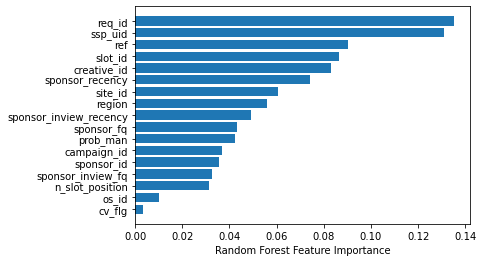

In [14]:
# sorted_idx = importances.argsort()
# plt.barh(X_train.columns[sorted_idx], rf.feature_importances_[sorted_idx])
# plt.xlabel("Random Forest Feature Importance")

In [16]:
# from sklearn.inspection import permutation_importance
# perm_importance = permutation_importance(rf, X_test, Y_test)


In [13]:
# sorted_idx = perm_importance.importances_mean.argsort()
# plt.barh(X_test.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
# plt.xlabel("Permutation Importance")

NameError: name 'perm_importance' is not defined

Text(0.5, 0, 'Permutation Importance')

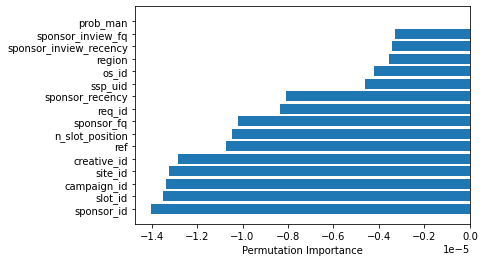

In [14]:
#permutation_importance
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(rf, X_n_test, Y_n_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X_n_test.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [28]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 5.6 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 7.3 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=ac7472f338966cb25b5c393caab4a34c49c6db0d1a5a5b82618c27e103fdcc0a
  Stored in directory: /home/jupyter/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(rf, random_state=1).fit(X_test, Y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

In [62]:
X_train.columns

Index(['req_id', 'os_id', 'ssp_uid', 'slot_id', 'n_slot_position',
       'sponsor_id', 'campaign_id', 'creative_id', 'region', 'ref', 'prob_man',
       'sponsor_fq', 'sponsor_inview_fq', 'sponsor_recency',
       'sponsor_inview_recency', 'cv_flg', 'site_id'],
      dtype='object')

In [63]:
std = np.std([  ## 计算各个重要程度取值的标准差
    tree.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X_train.columns)


In [69]:
forest_importances = forest_importances.sort_values(ascending=False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Glyph 32431 (\N{CJK UNIFIED IDEOGRAPH-7EAF}) missing from current font.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Glyph 19979 (\N{CJK UNIFIED IDEOGRAPH-4E0B}) missing from current font.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Glyph 38477 (\N{CJK UNIFIED IDEOGRAPH-964D}) missing from current font.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  


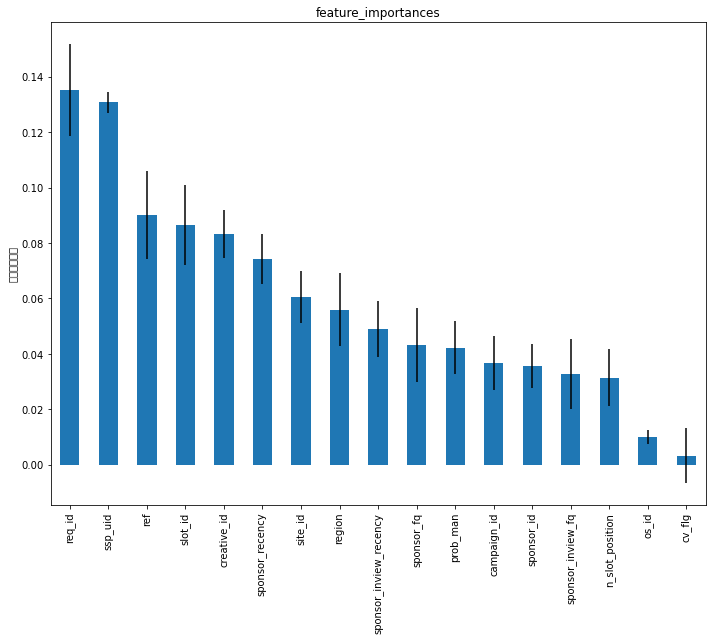

In [87]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(10, 9))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("feature_importances")
ax.set_ylabel("纯度下降均值")
fig.tight_layout()

In [72]:
print(forest_importances[:10].tolist())

req_id                    0.135144
ssp_uid                   0.130734
ref                       0.090058
slot_id                   0.086437
creative_id               0.083137
sponsor_recency           0.074214
site_id                   0.060443
region                    0.055947
sponsor_inview_recency    0.049061
sponsor_fq                0.043173
dtype: float64


In [77]:
lst = forest_importances[:10].index.tolist()

In [78]:
lst

['req_id',
 'ssp_uid',
 'ref',
 'slot_id',
 'creative_id',
 'sponsor_recency',
 'site_id',
 'region',
 'sponsor_inview_recency',
 'sponsor_fq']